<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kepler-Exoplanet-Search-Results" data-toc-modified-id="Kepler-Exoplanet-Search-Results-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kepler Exoplanet Search Results</a></span><ul class="toc-item"><li><span><a href="#Column-selection" data-toc-modified-id="Column-selection-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Column selection</a></span></li><li><span><a href="#NaN-values" data-toc-modified-id="NaN-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>NaN values</a></span><ul class="toc-item"><li><span><a href="#Renaming-columns" data-toc-modified-id="Renaming-columns-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Renaming columns</a></span></li></ul></li><li><span><a href="#Types" data-toc-modified-id="Types-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Types</a></span></li></ul></li><li><span><a href="#Numerical-columns" data-toc-modified-id="Numerical-columns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Numerical columns</a></span><ul class="toc-item"><li><span><a href="#Outliers" data-toc-modified-id="Outliers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Outliers</a></span></li></ul></li><li><span><a href="#Saving-processed-data" data-toc-modified-id="Saving-processed-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Saving processed data</a></span></li></ul></div>

In [68]:
#Importing standard libraries
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Increasing the number of rows and columns shown since database has 65 columns
pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 100)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Kepler Exoplanet Search Results

In [69]:
# Importing data
kepler = pd.read_csv('../datasets/kepler_detections.csv')
kepler.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


Since there is a lot of columns, we'll first see which ones we need to work with and which ones we can drop. Once that is done, we can start looking at the cleaning the data.

## Column selection

In [70]:
print(f"The dataframe has {kepler.shape[0]} rows and {kepler.shape[1]} columns.")

The dataframe has 9564 rows and 50 columns.


First, we will delete the columns that contain:
- `err`: Matrix covariances are adopted as errors to the fit parameters; they therefore ignore the effects of correlation between the fit parameters and are likely to be underestimates.
- `flag`.

In [71]:
to_drop = [col for col in kepler.columns if ('flag' in col) | ('err1' in col) | ('err2' in col)]
kepler.drop(to_drop, axis=1, inplace=True)

In [72]:
kepler.shape

(9564, 24)

We have gone from 50 columns to 24.

## NaN values

Checking what percentage of NaNs we have in each column and visualizing them:

In [73]:
((kepler.isnull().sum()) / kepler.shape[0]*100).sort_values(ascending=False)

kepler_name          76.014220
koi_score            15.788373
koi_depth             3.795483
koi_impact            3.795483
koi_srad              3.795483
koi_slogg             3.795483
koi_steff             3.795483
koi_model_snr         3.795483
koi_teq               3.795483
koi_prad              3.795483
koi_tce_delivname     3.617733
koi_tce_plnt_num      3.617733
koi_insol             3.356336
koi_kepmag            0.010456
koi_duration          0.000000
koi_time0bk           0.000000
koi_period            0.000000
dec                   0.000000
koi_pdisposition      0.000000
koi_disposition       0.000000
ra                    0.000000
kepoi_name            0.000000
kepid                 0.000000
rowid                 0.000000
dtype: float64

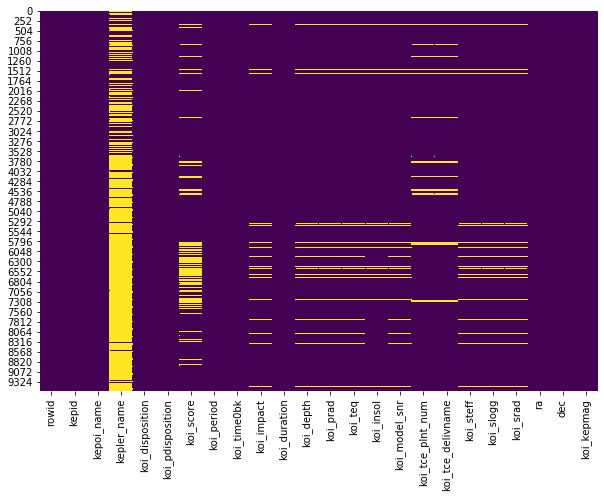

In [74]:
plt.figure(figsize=(10,7))
sns.heatmap(kepler.isnull(), cbar=False, cmap='viridis');

First, we will remove the colum kepler_name and koi_score with 76% and 15% of NaNs present, since we have other columns to identify the KOI (kepid and kepoi_name) and we don't really need the koi_score column. We will also remove the columns 'koi_tce_delivname' and 'koi_tce_plnt_num' because we don't need their information:

- koi_tce_plnt_num:	TCE Planet Number federated to the KOI.
- koi_tce_delivname: TCE delivery name corresponding to the TCE data federated to the KOI.

In [75]:
kepler.drop(['kepler_name', 'koi_score', 'koi_tce_delivname', 'koi_tce_plnt_num', 'rowid', 'kepid', 'kepoi_name', axis=1, inplace=True)], axis=1, inplace=True)

SyntaxError: invalid syntax (<ipython-input-75-7d8c04339303>, line 1)

Let's see how the dataframe looks now:

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(kepler.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
kepler[kepler.isnull().any(axis=1)].head()

The NaNs are all on the same rows, so we delete them.

In [ ]:
kepler = kepler.dropna()

In [ ]:
kepler.head()

Let's have a look at how many confirmed and false positives we have after dropping all NaNs:

In [ ]:
kepler.groupby('koi_disposition').count()

In [ ]:
kepler.shape

We've gone from 9564 rows to 9200.

### Renaming columns

In [ ]:
# For better understanding
kepler.rename(columns={'ra': 'right_ascension', 'dec': 'declination', 'koi_period': 'orb_period'}, inplace=True)

In [ ]:
# Removing 'koi' from all the column names to make it easier to read
new_cols = []

for name in kepler.columns:
    if name.startswith('koi_'):
        name = name.replace('koi_', '')
        new_cols.append(name)
    else:
        new_cols.append(name)
        
kepler.columns = new_cols

In [ ]:
kepler.head()

Now that we've removed all the information we didn't want, let's check if the information left is the right **type**.

## Types

In [ ]:
kepler.dtypes

All the columns expected to be numeric are float64 and the ones expected to be strings are object, so everything is correct.  
Next, we will get only the numeric data of the dataframe to visualize outliers with boxplots.

# Numerical columns

In [ ]:
kepler_numeric = kepler._get_numeric_data()
kepler_numeric.head()

## Outliers

In [ ]:
# Visualizing the outliers with boxplots
f = plt.figure(figsize=(18, 12))
i=1

for col in kepler_numeric.columns:
    subplot = f.add_subplot(math.ceil(kepler_numeric.shape[1]/3),3,i)
    sns.boxplot(x=kepler_numeric[col],whis=10)
    i=i+1
plt.subplots_adjust(hspace=0.4)
plt.show()

Since the information on the dataset has already been through scientific review to enter the dataset, we won't remove the outliers. If they interfere with anything at any point in the future, then we will deal with them.

# Saving processed data

In [ ]:
kepler.head()

In [ ]:
kepler.groupby('disposition').count()

In [ ]:
kepler.to_csv('../datasets/kepler_processed.csv', index=False)